In [71]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy as sp
print('scipy:', sp.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import matplotlib.pyplot as plt

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

import pandas as pd
print('pandas', pd.__version__)

IPython: 3.1.0
numpy: 1.9.2
scipy: 0.15.1
matplotlib: 1.4.3
scikit-learn: 0.16.1
seaborn 0.5.1
pandas 0.16.0


In [2]:
seaborn.set()

In [3]:
%matplotlib inline

##Data Exploration

In [4]:
#Get our data
titanicData = pd.read_csv('data/train.csv')


In [5]:
print('shape of training DF', titanicData.shape)

shape of training DF (891, 12)


In [6]:
#Split training data into an 80/20 split
titanicTrainingBatch = pd.DataFrame()
titanicTestingBatch = pd.DataFrame()

trainingMask = titanicData['PassengerId'] % 10 < 8
testingMask  = titanicData['PassengerId'] % 10 > 8

titanicTrainingBatch = titanicData[trainingMask]
titanicTestingBatch  = titanicData[testingMask]

print('shape of training batch', titanicTrainingBatch.shape)
print('shape of testing batch', titanicTestingBatch.shape)

shape of training batch (713, 12)
shape of testing batch (89, 12)


In [7]:
titanicTrainingBatch.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
#make a series holding the columns
titanicDataFeatures = titanicTrainingBatch.columns
titanicDataFeatures.view()

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'], dtype='object')

In [9]:
#Basic Statistic Values
titanicTrainingBatch.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,713.000000,713.000000,713.000000,580.000000,713.000000,713.000000,713.000000
mean,445.375877,0.373072,2.314165,29.966103,0.552595,0.349229,30.228967
std,257.462104,0.483960,0.837689,14.736764,1.167369,0.743929,41.915033
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.400000
75%,667.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


(-1, 3)

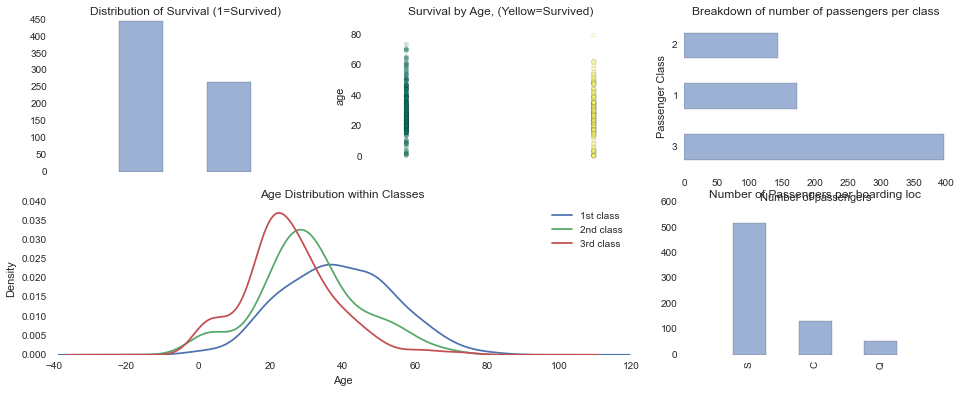

In [10]:
#Specify parameters of graphs
SurvivalFigure = plt.figure(figsize=(16,6), dpi=1600)
alpha_scatterplot = 0.2
alpha_barchart = 0.55

#Basic survival plot
ax1 = plt.subplot2grid((2,3), (0,0))
titanicTrainingBatch.loc[ : , 'Survived'].value_counts().plot(kind='bar',alpha=alpha_barchart)
ax1.set_xlim(-1,2)
plt.title('Distribution of Survival (1=Survived)')

#Survival By Age
ax2 = plt.subplot2grid((2,3), (0,1))
plt.scatter(titanicTrainingBatch.loc[:, 'Survived'],titanicTrainingBatch.loc[:, 'Age'], c=titanicTrainingBatch.loc[:, 'Survived'], cmap='summer', alpha=alpha_scatterplot )
plt.grid(b=True, which='major', axis='y')
plt.ylabel('age')
plt.title('Survival by Age, (Yellow=Survived)')

#Passenger Class Distribution
ax3 = plt.subplot2grid((2,3), (0,2))
titanicTrainingBatch.loc[:, 'Pclass'].value_counts().plot(kind='barh', alpha=alpha_barchart)
plt.ylabel('Passenger Class')
plt.xlabel('Number of passengers')
plt.title('Breakdown of number of passengers per class')

#Kernel Density Estimate of Age Distribution within classes
ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
for classNum in range(3):
    titanicTrainingBatch.loc[:, 'Age'][titanicTrainingBatch.Pclass == classNum+1].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(('1st class', '2nd class', '3rd class'), loc='best')

#Passengers by boarding loc
ax5 = plt.subplot2grid((2,3), (1,2))
titanicTrainingBatch.loc[: , 'Embarked'].value_counts().plot(kind='bar', alpha=alpha_barchart)
plt.title('Number of Passengers per boarding loc')
ax5.set_xlim(-1,len(titanicTrainingBatch.Embarked.value_counts()))

###Explore Survival/Death

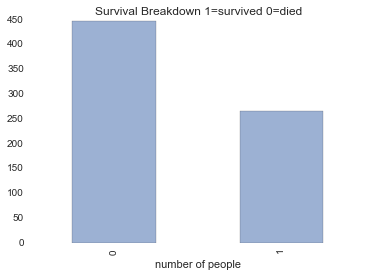

In [11]:
plt.figure(figsize=(16,6))
fig, ax = plt.subplots()
titanicTrainingBatch.loc[:, 'Survived'].value_counts().plot(kind='bar', alpha=alpha_barchart)
plt.xlabel('number of people')
plt.title('Survival Breakdown 1=survived 0=died')

####Survival Breakdown by Gender

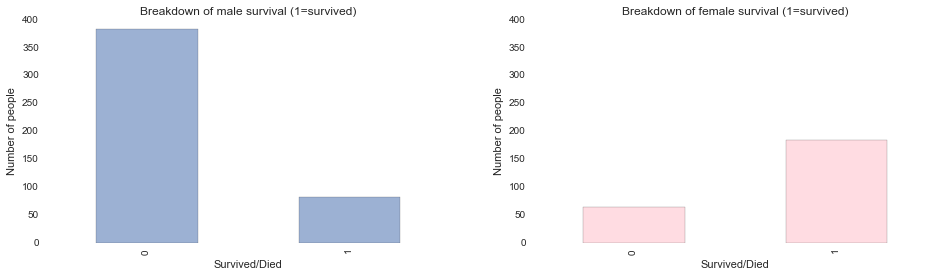

In [12]:
genderFigure = plt.figure(figsize=(16,4))

maleAxes = genderFigure.add_subplot(1,2,1)
maleMask = titanicTrainingBatch.Sex == 'male'
maleSurvivalCounts = titanicTrainingBatch.Survived[maleMask].value_counts()
maleSurvivalCounts.plot(kind='bar', alpha=alpha_barchart)
plt.xlabel('Survived/Died')
plt.ylabel('Number of people')
plt.title('Breakdown of male survival (1=survived)')

femaleAxes = genderFigure.add_subplot(1,2,2, sharey=maleAxes)
femaleMask = titanicTrainingBatch.Sex == 'female'
femaleSurvivalCounts = titanicTrainingBatch.Survived[femaleMask].value_counts()
femaleSurvivalCounts.sort(0) #so both display same x axis
femaleSurvivalCounts.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.xlabel('Survived/Died')
plt.ylabel('Number of people')
plt.title('Breakdown of female survival (1=survived)')

In [13]:
#Graph survival in terms of percentages
numberOfWomen = len(titanicTrainingBatch[femaleMask])
numberOfMen = len(titanicTrainingBatch[maleMask])

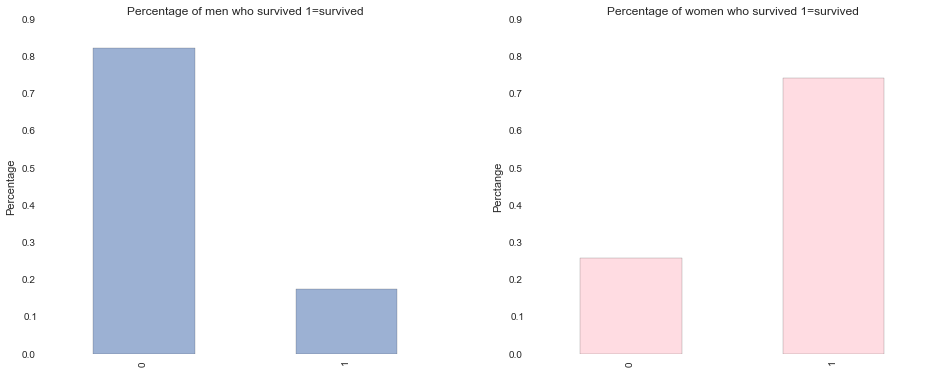

In [14]:
genderPercentagesFigure = plt.figure(figsize=(16,6))

maleAxes = genderPercentagesFigure.add_subplot(1,2,1)
maleSurvivalPercentages = maleSurvivalCounts / numberOfMen
maleSurvivalPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.ylabel('Percentage')
plt.title('Percentage of men who survived 1=survived')

femaleAxes = genderPercentagesFigure.add_subplot(1,2,2, sharey=maleAxes)
femaleSurvivalPercentages = femaleSurvivalCounts / numberOfWomen
femaleSurvivalPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.ylabel('Perctange')
plt.title('Percentage of women who survived 1=survived')



####Gender Survival Breakdown Into Passenger Class

In [15]:
#Get the three classes
upperClass = titanicTrainingBatch[titanicTrainingBatch.Pclass==1]
middleClass = titanicTrainingBatch[titanicTrainingBatch.Pclass==2]
lowerClass = titanicTrainingBatch[titanicTrainingBatch.Pclass==3]

/Users/Jslice/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1815: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


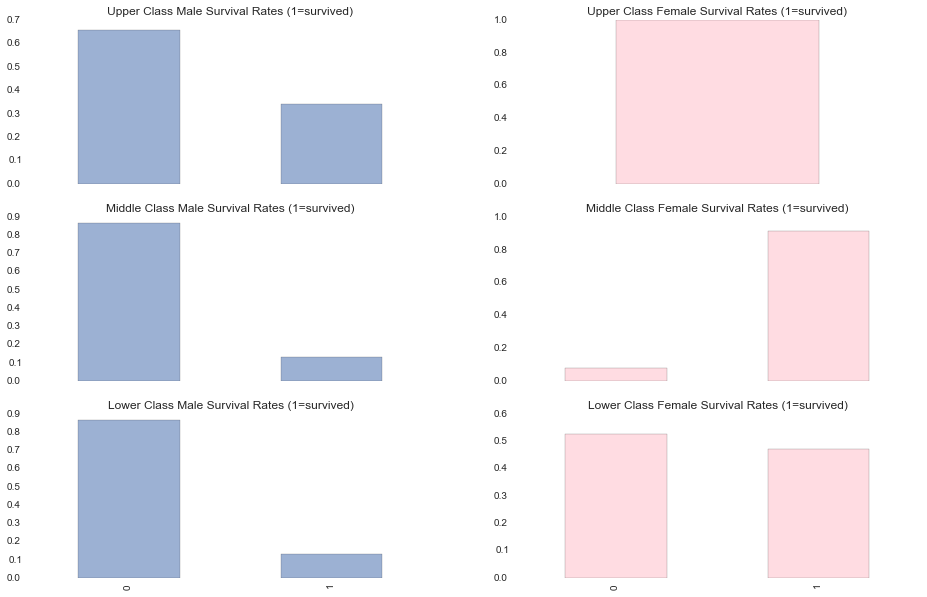

In [16]:
#make gender survival classes for all 3 classes
classGenderFigure = plt.figure(figsize=(16,10))

##Upper Class##
upperClassMaleAx = classGenderFigure.add_subplot(3,2,1)
upperClassMaleCount = len(upperClass[maleMask])
upperClassMPercentages = upperClass.Survived[maleMask].value_counts() / upperClassMaleCount
upperClassMPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.title('Upper Class Male Survival Rates (1=survived)')


upperClassFemaleAx = classGenderFigure.add_subplot(3,2,2)
upperClassFemaleCount = len(upperClass[femaleMask])
upperClassFPercentages = upperClass.Survived[femaleMask].value_counts() / upperClassFemaleCount
upperClassFPercentages.sort()
upperClassFPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Upper Class Female Survival Rates (1=survived)')


##Middle Class##
middleClassMaleAx = classGenderFigure.add_subplot(3,2,3)
middleClassMaleCount = len(middleClass[maleMask])
middleClassMPercentages = middleClass.Survived[maleMask].value_counts() / middleClassMaleCount
middleClassMPercentages.plot(kind='bar', alpha=alpha_barchart)
plt.title('Middle Class Male Survival Rates (1=survived)')

middleClassFemaleAx = classGenderFigure.add_subplot(3,2,4)
middleClassFemaleCount = len(middleClass[femaleMask])
middleClassFPercentages = middleClass.Survived[femaleMask].value_counts() / middleClassFemaleCount
middleClassFPercentages.sort(0)
middleClassFPercentages.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Middle Class Female Survival Rates (1=survived)')

##Lower Class##
lowerClassMaleAx = classGenderFigure.add_subplot(3,2,5)
lowerClassMaleCount = len(lowerClass[maleMask])
lowerClassMPercentanges = lowerClass.Survived[maleMask].value_counts() / lowerClassMaleCount
lowerClassMPercentanges.plot(kind='bar', alpha=alpha_barchart)
plt.title('Lower Class Male Survival Rates (1=survived)')


lowerClassFemaleAx = classGenderFigure.add_subplot(3,2,6)
lowerClassFemaleCount = len(lowerClass[femaleMask])
lowerClassFPercentanges = lowerClass.Survived[femaleMask].value_counts() / lowerClassFemaleCount
lowerClassFPercentanges.sort(ascending=False)
lowerClassFPercentanges.plot(kind='bar', alpha=alpha_barchart, color='pink')
plt.title('Lower Class Female Survival Rates (1=survived)')




####Higher Dimensional Scatterplot Analysis

In [17]:
titanicTrainingAge = titanicTrainingBatch.loc[: , 'Age']
titanicTrainingFare = titanicTrainingBatch.loc[: ,'Fare']
titanicTrainingSurvived = titanicTrainingBatch.loc[:, 'Survived']


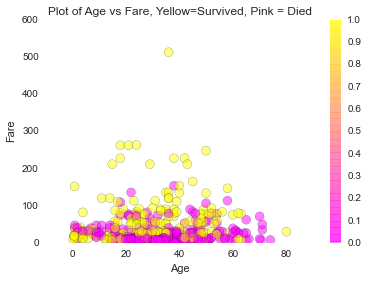

In [18]:
plt.scatter(titanicTrainingAge, titanicTrainingFare, c=titanicTrainingSurvived, s=80, cmap='spring', alpha=0.5)
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.ylim(0,600)
plt.title('Plot of Age vs Fare, Yellow=Survived, Pink = Died')

###Identify Families/Traveling Groups and Analyze Survival Rates

In [19]:
ticketGrouping = titanicTrainingBatch.groupby(titanicTrainingBatch['Ticket'])
ticketGroupingSurvivalData = ticketGrouping['Survived'].agg([np.sum, len])
ticketGroupingSurvivalData['percentLived'] = ticketGroupingSurvivalData['sum'] / ticketGroupingSurvivalData['len']

In [20]:
ticketGroupingSurvivalGroupSizes = ticketGroupingSurvivalData.groupby('len')
ticketGroupingSurvivalGroupSizes.describe()

percentLived         sum
len                                
1   count    472.000000  472.000000
    mean       0.302966    0.302966
    std        0.460028    0.460028
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        1.000000    1.000000
    max        1.000000    1.000000
2   count     78.000000   78.000000
    mean       0.596154    1.192308
    std        0.411346    0.822693
    min        0.000000    0.000000
    25%        0.125000    0.250000
    50%        0.500000    1.000000
    75%        1.000000    2.000000
    max        1.000000    2.000000
3   count     11.000000   11.000000
    mean       0.575758    1.727273
    std        0.424026    1.272078
    min        0.000000    0.000000
    25%        0.166667    0.500000
    50%        0.666667    2.000000
    75%        1.000000    3.000000
    max        1.000000    3.000000
4   count      3.000000    3.000000
    mean       0.583333    2.333333
    std        0.520416    2.081666
    min        0.000000    0.000000
    25%        0.375000    1.500000
    50%        0.750000    3.000000
    75%        0.875000    3.500000
    max        1.000000    4.000000
5   count      4.000000    4.000000
    mean       0.000000    0.000000
    std        0.000000    0.000000
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        0.000000    0.000000
    max        0.000000    0.000000
6   count      1.000000    1.000000
    mean       0.666667    4.000000
    std             NaN         NaN
    min        0.666667    4.000000
    25%        0.666667    4.000000
    50%        0.666667    4.000000
    75%        0.666667    4.000000
    max        0.666667    4.000000
7   count      2.000000    2.000000
    mean       0.000000    0.000000
    std        0.000000    0.000000
    min        0.000000    0.000000
    25%        0.000000    0.000000
    50%        0.000000    0.000000
    75%        0.000000    0.000000
    max        0.000000    0.000000

In [21]:
ticketGroupingSurvivalGroupSizesMean = ticketGroupingSurvivalGroupSizes['percentLived'].mean()

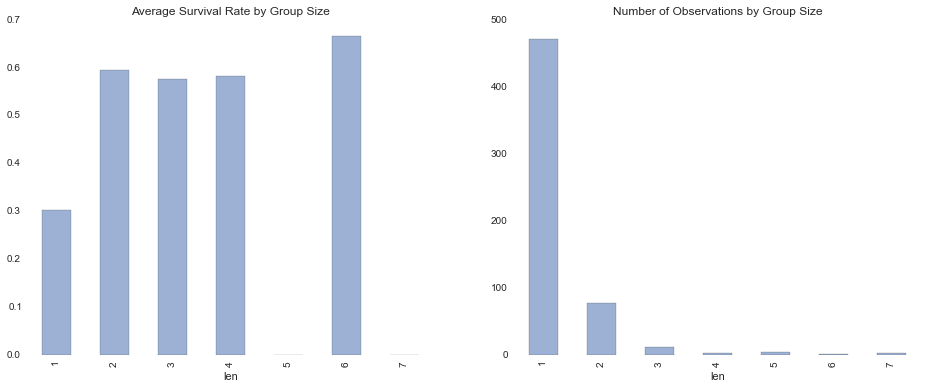

In [22]:
ticketGroupSurvivalFig = plt.figure(figsize=(16,6))
ticketGroupSurvivalAx1 = ticketGroupSurvivalFig.add_subplot(1,2,1)
ticketGroupingSurvivalGroupSizesMean.plot(kind='bar', alpha=alpha_barchart)
plt.title('Average Survival Rate by Group Size')
ticketGroupSurvivalAx2 = ticketGroupSurvivalFig.add_subplot(1,2,2)
ticketGroupingSurvivalGroupSizes['percentLived'].count().plot( kind='bar', alpha=alpha_barchart)
plt.title('Number of Observations by Group Size')

The only group sizes we can use are size one and two

##Data Cleaning/Munging

In [23]:
#Missing Data Amount
titanicTrainingBatch.isnull().sum() / len(titanicTrainingBatch) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            18.653576
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          76.718093
Embarked        0.280505
dtype: float64

In [24]:
#Kill off nan values
titanicTrainingBatch = titanicTrainingBatch.dropna()
titanicTrainingBatchSurvived = titanicTrainingBatch['Survived']

In [25]:
print('titanic training data dimensions after killing off na values', titanicTrainingBatch.shape)

titanic training data dimensions after killing off na values (149, 12)


##Data Modeling

In [26]:
#Results dictionary to hold regression results
results = {}

####K-Nearest-Neighbors

In [27]:
from sklearn import neighbors

ValueError: x and y must be the same size

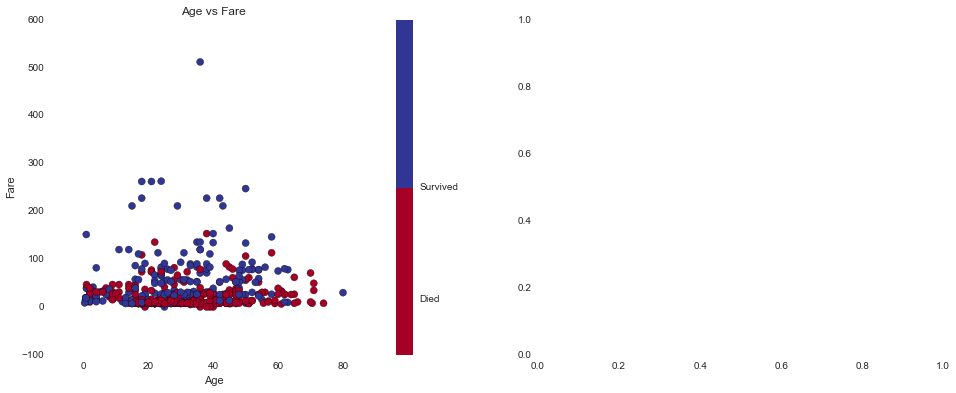

In [28]:
KNNFigure = plt.figure(figsize=(16,6))
targetNames = ['Died', 'Survived']
#formatter will label colorbor with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: targetNames[int(i)])
titanicTrainingPclass = titanicTrainingBatch.loc[: , 'Pclass']
ax1 = KNNFigure.add_subplot(1,2,1)
plt.scatter(titanicTrainingAge, titanicTrainingFare, c=titanicTrainingSurvived, s=50, cmap=plt.cm.get_cmap('RdYlBu',2))
plt.colorbar(ticks=[0,1], format=formatter)
plt.clim(-0.5,2.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')

ax2 = KNNFigure.add_subplot(1,2,2)
plt.scatter(titanicTrainingAge, titanicTrainingPclass, c=titanicTrainingSurvived, s=50, cmap=plt.cm.get_cmap('RdYlBu',2))
plt.colorbar(ticks=[0,1], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel('Age')
plt.ylabel('Passenger Class')
plt.title('Age vs Passenger Class')

plt.show()

In [29]:
numNeighbors = 10
titanicKNN = neighbors.KNeighborsClassifier(n_neighbors=numNeighbors)
print('titanic training target values: ', titanicTrainingBatchSurvived.shape)
print('titanic training x values:', titanicTrainingBatch.shape)

titanic training target values:  (149,)
titanic training x values: (149, 12)


In [30]:
KNNFormula = 'Survived ~ Age + Fare'
titanicTrainingKNNX = titanicTrainingBatch.loc[: , ['Age','Fare']]

In [31]:
titanicKNN.fit(titanicTrainingKNNX, titanicTrainingBatchSurvived)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

In [32]:
titanicTestingBatchKNNX = titanicTestingBatch.loc[: , ['Age','Fare']]
titanicTestingKNNX = titanicTestingBatchKNNX.dropna()
print('shape of titanic testing data', titanicTestingKNNX.shape)
print('shape of titanic training data', titanicTrainingBatch.shape)

shape of titanic testing data (64, 2)
shape of titanic training data (149, 12)


In [33]:
#Prediction Results
results['KNN'] = titanicKNN.predict(titanicTestingKNNX)

####Binary Logistic Regression
Will calculate the survival likelihood cutoff

In [34]:
#Model formula
logitRegFormula = 'Survived ~C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Fare'

In [35]:
#Making our regression friendly dataframes
logitX = titanicTrainingBatch.loc[:, ['Age', 'Pclass', 'Fare', 'Parch', 'SibSp','Sex']]
logitX = logitX.dropna()
logitX['Sex'] = logitX['Sex'].astype('category')
logitX = pd.get_dummies(logitX)

logitY = titanicTrainingBatch.Survived

In [36]:
#Alt way to hold data
from patsy import dmatrices
logitYDF, logitXDF = dmatrices(logitRegFormula, data=titanicTrainingBatch, return_type='dataframe')

In [37]:
import statsmodels.api as sm
#Instantiate our logistic regression model
logitModel = sm.Logit(logitYDF, logitXDF)
logitResults = logitModel.fit()

Optimization terminated successfully.
         Current function value: 0.365665
         Iterations 7


In [38]:
logitResults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  149
Model:                          Logit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Tue, 23 Jun 2015   Pseudo R-squ.:                  0.4134
Time:                        11:12:54   Log-Likelihood:                -54.484
converged:                       True   LL-Null:                       -92.884
                                        LLR p-value:                 2.150e-13
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            5.3421      1.250      4.274      0.000         2.892     7.792
C(Pclass)[T.2]      -0.2924      1.056     -0.277      0.782        -2.363     1.778
C(Pclass)[T.3]      -2.2693      1.166     -1.946      0.052        -4.555     0.016
C(Sex)[T.male]      -3.4458      0.707     -4.872      0.000        -4.832    -2.059
C(Embarked)[T.Q]    -2.5388      2.144     -1.184      0.236        -6.740     1.663
C(Embarked)[T.S]    -0.2593      0.542     -0.479      0.632        -1.321     0.803
Age                 -0.0592      0.019     -3.130      0.002        -0.096    -0.022
SibSp                0.5658      0.503      1.126      0.260        -0.419     1.551
Fare                 0.0039      0.005      0.783      0.434        -0.006     0.014
====================================================================================
"""

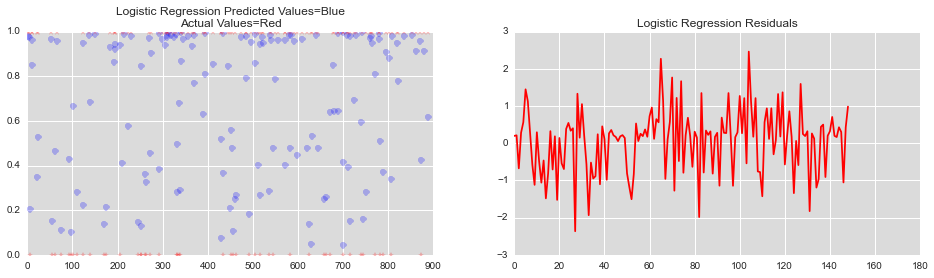

In [39]:
logitResultsFigure = plt.figure(figsize=(16,4))
logitResultsAx = logitResultsFigure.add_subplot(1,2,1,axisbg='#DBDBDB')
#generate predictions from logit model
survivalPredictions = logitResults.predict(logitXDF)
logitResultsAx.plot(logitXDF.index,survivalPredictions, 'bo', logitXDF.index, logitYDF, 'r*', alpha=.25)
plt.title('Logistic Regression Predicted Values=Blue \nActual Values=Red')

logitResultsResidualsAx = logitResultsFigure.add_subplot(1,2,2, axisbg='#DBDBDB')
logitResultsResidualsAx.plot(logitResults.resid_dev,'r-')
logitResultsResidualsAx.set_xlim(0,180)
plt.title('Logistic Regression Residuals')

Analyze logistic regression model predictions

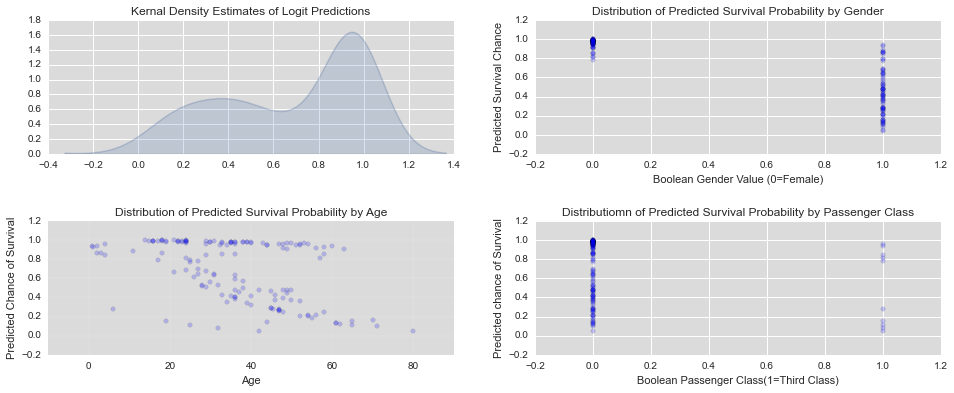

In [40]:
from statsmodels.nonparametric.kde import KDEUnivariate
logitPredictionsFigure = plt.figure(figsize=(16,6))
predictionsAlpha = 0.2

ax1 = logitPredictionsFigure.add_subplot(2,2,1, axisbg='#DBDBDB')
kde = KDEUnivariate(logitResults.predict())
kde.fit()
ax1.plot(kde.support, kde.density, alpha=predictionsAlpha)
ax1.fill_between(kde.support, kde.density, alpha=predictionsAlpha)
plt.title('Kernal Density Estimates of Logit Predictions')

ax2 = logitPredictionsFigure.add_subplot(2,2,2, axisbg='#DBDBDB')
ax2.scatter(y=logitResults.predict(), x=logitXDF['C(Sex)[T.male]'], alpha=predictionsAlpha)
plt.grid(b=True, which='major', axis='y')
plt.ylabel('Predicted Survival Chance')
plt.xlabel('Boolean Gender Value (0=Female)')
plt.title('Distribution of Predicted Survival Probability by Gender')

ax3 = logitPredictionsFigure.add_subplot(2,2,3, axisbg='#DBDBDB')
ax3.scatter(x=logitXDF['Age'],y=logitResults.predict(), alpha=predictionsAlpha)
plt.grid(True, linewidth=0.15)
plt.ylabel('Predicted Chance of Survival')
plt.xlabel('Age')
plt.title('Distribution of Predicted Survival Probability by Age')

ax4 = logitPredictionsFigure.add_subplot(2,2,4, axisbg='#DBDBDB')
ax4.scatter(x=logitXDF['C(Pclass)[T.3]'], y=logitResults.predict(), alpha=predictionsAlpha)
plt.grid(True, which='major', axis='y')
plt.xlabel('Boolean Passenger Class(1=Third Class)')
plt.ylabel('Predicted chance of Survival')
plt.title('Distributiomn of Predicted Survival Probability by Passenger Class')

logitPredictionsFigure.subplots_adjust(hspace=0.5, wspace=0.2)

####SVC for Fare and Age Features

In [41]:
from sklearn.svm import SVC

In [42]:
SVMX2 = titanicTrainingBatch.loc[:, ['Age', 'Pclass', 'Fare', 'Parch', 'SibSp','Sex']]
SVMX = titanicTrainingBatch.loc[:, ['Age', 'Fare']]
SVMY = titanicTrainingBatch.Survived
SVMX2['Sex'] = SVMX2['Sex'].astype('category')
SVMX2 = pd.get_dummies(SVMX)

In [43]:
linearSVC = SVC(kernel='linear')
linearSVC.fit(SVMX, SVMY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

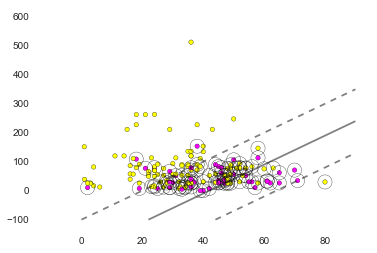

In [44]:
#Make convenience function to visualize what is happening (will plot SVM decision boundaries)
def plot_svc_decision_function(classifier, ax=None):
    "Plot the decision function for a 2D SVC"
    if ax is None:
        ax = plt.gca() #get current class instance on current figure matching given keyword args or create one
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y,x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = classifier.decision_function([xi, yj])
    #plot the margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-', '--'] )

plt.scatter(SVMX.loc[:, 'Age'], SVMX.loc[:, 'Fare'], c=SVMY, cmap='spring')
plot_svc_decision_function(linearSVC)
plt.scatter(linearSVC.support_vectors_[:, 0], linearSVC.support_vectors_[:, 1], s=200, facecolors='none')
plt.show()

In [45]:
SVMX

,Age,Fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500
21,34.0,13.0000
23,28.0,35.5000
52,49.0,76.7292
54,65.0,61.9792
62,45.0,83.4750


####Random Forest

In [46]:
#Import ensemble library from sklean
import sklearn.ensemble as ske

#make random forst model and fit model to the training data
randomForestFormula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

randomForestY, randomForestX = dmatrices(randomForestFormula, data=titanicTrainingBatch, return_type='dataframe')

In [47]:
randomForestX.describe()

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Age,SibSp,Parch
count,149,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,1,0.073826,0.067114,0.523490,0.013423,0.630872,36.012886,0.442953,0.409396
std,0,0.262369,0.251063,0.501132,0.115465,0.484196,15.738591,0.597094,0.677968
min,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.920000,0.000000,0.000000
25%,1,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000
50%,1,0.000000,0.000000,1.000000,0.000000,1.000000,36.000000,0.000000,0.000000
75%,1,0.000000,0.000000,1.000000,0.000000,1.000000,48.000000,1.000000,1.000000
max,1,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,3.000000,2.000000


In [48]:
print('shape of randomForestX', randomForestX.shape)
print('shape of randomForestY', randomForestY.shape)

shape of randomForestX (149, 9)
shape of randomForestY (149, 1)


In [49]:
rfClassifier = ske.RandomForestClassifier(n_estimators=100)

In [50]:
randomForestResults = rfClassifier.fit(X=randomForestX, y=randomForestY)

/Users/Jslice/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [51]:
#score results
randomForestScore = randomForestResults.score(randomForestX, randomForestY) 

In [52]:
randomForestTestingY, randomForestTestingX = dmatrices(randomForestFormula, data= titanicTestingBatch, return_type='dataframe')

results['random forest'] = rfClassifier.predict(randomForestTestingX)

##Model Evaluation/Validation

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc

def print_model_information(model_name, formula, shape):
    print(model_name, formula,shape)
    
def model_accuracy(model_name, predictions, actual):
    print(model_name, accuracy_score(actual, predictions))
    
def print_roc_curve(model_name, predictions, actual):
    print('ROC Curve for model: ', model_name)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)    
    print('ROC Area Under Curve Score: ', roc_auc_score(actual, predictions))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def print_confusion_matrix(model_name, predictions, actual, title='Confusion Matrix', cmap=plt.cm.Blues):
    matrix = confusion_matrix(actual, predictions)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Died', 'Survived'], rotation=45)
    plt.yticks(tick_marks, ['Died', 'Survived'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [60]:
#Print Model Info
print_model_information('RandomForest', randomForestFormula, randomForestX.shape)
print_model_information('logitistic regression', logitRegFormula, logitXDF.shape)
print_model_information('Knearest neighbors', KNNFormula, titanicTrainingKNNX.shape)

RandomForest Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked) (149, 9)
logitistic regression Survived ~C(Pclass) + C(Sex) + Age + SibSp + C(Embarked) + Fare (149, 9)
Knearest neighbors Survived ~ Age + Fare (149, 2)


In [74]:
#Print model accuracies
model_accuracy('random forest', randomForestTestingY['Survived'], results['random forest'])

random forest 0.640625


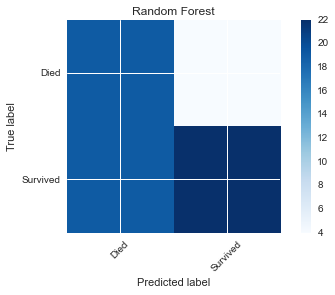

In [95]:
#Print Confusion Matrices
print_confusion_matrix('random forest', randomForestTestingY['Survived'], results['random forest'], title='Random Forest', cmap=plt.cm.Blues)

ROC Curve for model:  random forest
ROC Area Under Curve Score:  0.681336161188


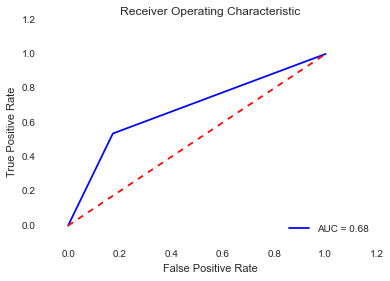

In [79]:
print_roc_curve('random forest', randomForestTestingY, results['random forest'])

##Optimization

##Visualization of Results

,Survived
8,1
18,0
38,0
58,1
68,1
78,1
88,1
98,1
108,0
118,0
